In [4]:
#The Variational Quantum Eigensolver
import numpy as np
from pylab import *
import copy
import scipy as scp
from scipy import *
import matplotlib.pyplot as plt
from pyscf import *
from qiskit import BasicAer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.chemistry.components.initial_states import HartreeFock
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.drivers import PySCFDriver
from qiskit.chemistry.core import Hamiltonian, QubitMappingType
from qiskit.aqua.components.optimizers import SLSQP
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
molecule = 'H .0 .0 -{0}; Li .0 .0 {0}'
distances = np.arange(0.4,4.25,0.25)
vqe_energies = []
hf_energies = []
exact_energies = []


In [6]:
for i,d in enumerate(distances):
    print('step',i)
    
    #set up experiment
    driver = PySCFDriver(molecule.format(d/2), basis='sto3g')
    qmolecule = driver.run()
    operator = Hamiltonian(qubit_mapping=QubitMappingType.PARITY,
                           two_qubit_reduction=True, freeze_core=True,
                           orbital_reduction=[-3,-2])
    qubit_op, aux_ops = operator.run(qmolecule)
    #aux_ops = operator.run(qmolecule)
    
    #exact classical result
    exact_result = NumPyMinimumEigensolver(qubit_op, aux_operators=aux_ops).run()
    #exact_result = NumPyMinimumEigensolver(operator=qubit_op, aux_operators=aux_ops)
    exact_result = operator.process_algorithm_result(exact_result)
    
    #VQE
    optimizer = SLSQP(maxiter=1000)
    #scp.optimize(method='SLSQP',options={'maxiter': 100})
    initial_state = HartreeFock(operator.molecule_info['num_orbitals'],
                               operator.molecule_info['num_particles'],
                               qubit_mapping=operator._qubit_mapping,
                               two_qubit_reduction=operator._two_qubit_reduction)
    var_form = UCCSD(num_orbitals=operator.molecule_info['num_orbitals'],
                    num_particles=operator.molecule_info['num_particles'],
                    initial_state=initial_state,
                    qubit_mapping=operator._qubit_mapping,
                    two_qubit_reduction=operator._two_qubit_reduction)
    algo = VQE(qubit_op, var_form, optimizer, aux_operators=aux_ops)
    
    vqe_result = algo.run(QuantumInstance(BasicAer.get_backend('statevector_simulator')))
    vqe_result = operator.process_algorithm_result(vqe_result)
    exact_energies.append(exact_result.energy)
    vqe_energies.append(vqe_result.hartree_fock_energy)
    
    

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15


In [ ]:
#plt.plot(distances, hf_energies, label='Hartree-Fock')
#print(distances)
#print(exact_energies)
#pylab.plot(distances,hf_energies, label='Hartree-Fock')
#pylab.plot(distances,vqe_energies)


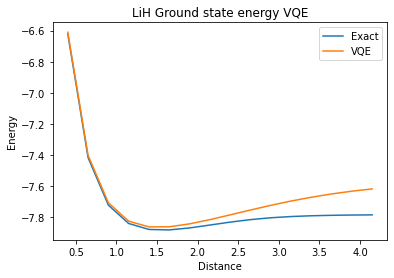

In [7]:
plt.plot(distances,exact_energies , label='Exact')
plt.plot(distances,vqe_energies , label = 'VQE')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('LiH Ground state energy VQE')
plt.legend(loc = 'upper right')
#plt.plot(distances,hf_energies)
#plt.plot(distances,hf_energies)

In [11]:
#scf calculation
test_energies = []
distances = np.arange(0.4,4.25,0.25)
#print(distances)
for i,d in enumerate(distances):
    #atom='H 0 0 0; Li 0 0 '+ str(distances[i])
    mol = gto.M(atom='H 0 0 0; Li 0 0 ' + str(distances[i]), basis='sto3g')
    mf = scf.RHF(mol)
    test_energies.append(mf.kernel())

converged SCF energy = -6.61025894411096
converged SCF energy = -7.40117989210125
converged SCF energy = -7.70575334013612
converged SCF energy = -7.82371099003545
converged SCF energy = -7.86053866102069
converged SCF energy = -7.85985170433423
converged SCF energy = -7.8411120407714
converged SCF energy = -7.81394698643818
converged SCF energy = -7.78338162715539
converged SCF energy = -7.75221794497157
converged SCF energy = -7.72221878314936
converged SCF energy = -7.69458577793976
converged SCF energy = -7.67006034951133
converged SCF energy = -7.64894647471239
converged SCF energy = -7.63119346070691
converged SCF energy = -7.61652242318562


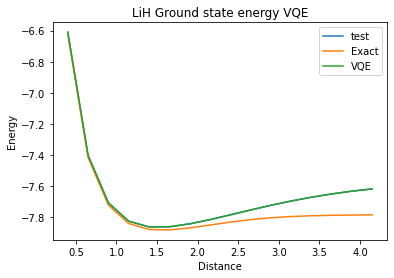

In [16]:
plt.plot(distances,test_energies , label='test')
plt.plot(distances,exact_energies , label='Exact')
plt.plot(distances,vqe_energies , label = 'VQE')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('LiH Ground state energy VQE')
plt.legend(loc = 'upper right')

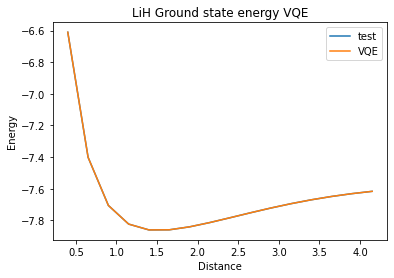

In [17]:
plt.plot(distances,test_energies , label='test')
#plt.plot(distances,exact_energies , label='Exact')
plt.plot(distances,vqe_energies , label = 'VQE')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('LiH Ground state energy VQE')
plt.legend(loc = 'upper right')

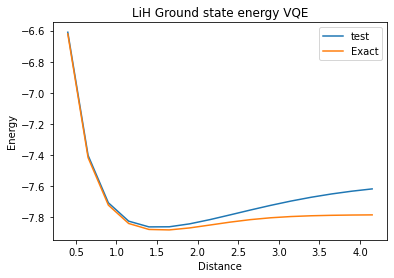

In [18]:
plt.plot(distances,test_energies , label='test')
plt.plot(distances,exact_energies , label='Exact')
#plt.plot(distances,vqe_energies , label = 'VQE')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('LiH Ground state energy VQE')
plt.legend(loc = 'upper right')

In [ ]:
from pyscf import gto, scf
mol = gto.M(
    atom = 'H 0 0 0; Li 0 0 1.1',  # in Angstrom
    basis = 'ccpvdz',
    symmetry = True,
)
mf = scf.RKS(mol)
mf.xc = 'lda,vwn' #default functional
mf.kernel()